# Dave J Project

## Importing Necessary Functions 

In the brief we were told to find a dataset and download and run some code related to this data. We acquired both the base code and dataset for this look at loan applications from Kaggle (https://www.kaggle.com/code/bhavikbb/loan-prediction-dataset/notebook)

We begin by importing the libraries we will need to analyse and visualise the data. 

In [2]:
#For data
import pandas as pd
import numpy as np

#For visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

These are all the packages which we shall need to run this code. numpy and pandas assist with the processing of the data and conducting calculations on said data.

In [5]:
# Use the direct download link format
file_id = '1knlYNzuAATNKuNfxq7My7dh-EKrISoGi'
csv_url = f'https://drive.google.com/uc?id={file_id}'

# Read the CSV file
train_data = pd.read_csv(csv_url)


We utilised the pandas package to read the data.

We now want to investigate features of the data.

In [18]:
train_data.shape

(614, 13)

Our data contains details of 13 variables for 614 individuals who have applied for a loan.

In [10]:
#Seeing what the columns on the dataset are 

list(train_data.columns)

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

These are the variables within our dataset. 

In [13]:
#taking a look at the data

train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [14]:
#investigating the distribution of the variables of the data

train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


The .describe functions gives us detail about how each variable is distributed. For example we can see for 'ApplicantIncome' we have data for everyone, with the lowest income at 150 and the highest at 81000 and a mean of 5403.46

<Axes: >

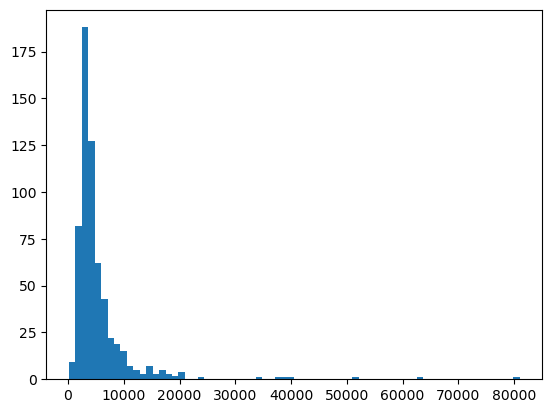

In [15]:
#Histogram of the loan applicant's income

train_data['ApplicantIncome'].hist(bins=70,grid=False)

The histogram lets us easily the financial background of the applicants  very easily. We can see that the majority of those applying for loans have a fairly low income, with very few above the 20000 mark.

<Axes: >

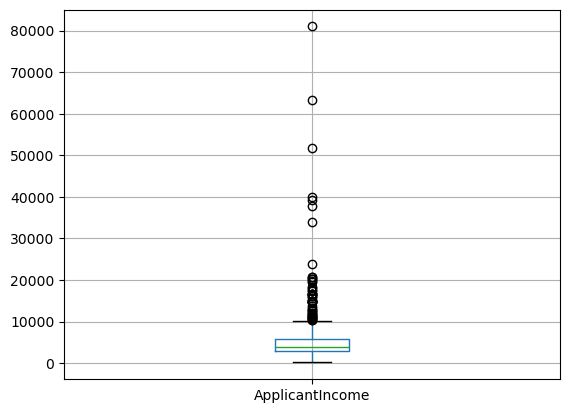

In [41]:
#Boxplot of applicant income to see the outliers and where the majority of the applicants income lies.

train_data.boxplot(column = 'ApplicantIncome')

The boxplot helps identify the outliers and gives us a visual description of the information we acquired using the .describe function.

<Axes: title={'center': 'ApplicantIncome'}, xlabel='Education'>

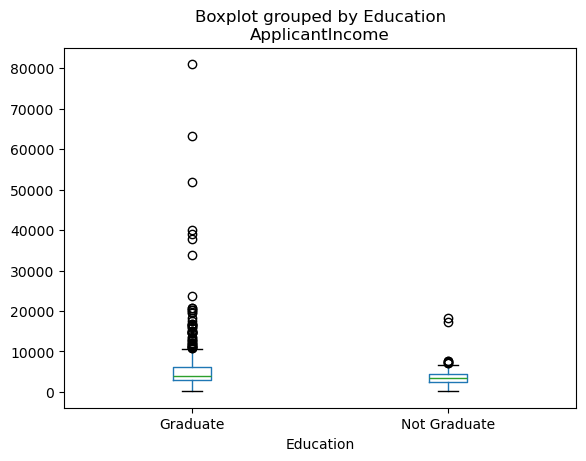

In [42]:
#Boxplot split between Grads and Non Grads to see the effect of education on the loan applicants

train_data.boxplot(column = 'ApplicantIncome', grid =False, by = 'Education')

Categorising the applicant income data by education helps us see the impact that being a Graduate has. We can see the median income is similar between the two groups, however there's more diversity in the income of Graduates and they tend to be higher earners as we can see by the outliers.

<Axes: >

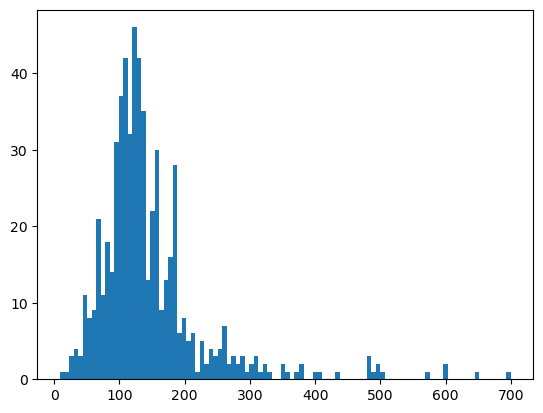

In [43]:
#Distribution of loan amount given out

train_data['LoanAmount'].hist(bins=100,grid = False)

The loan amounts issued are normally distributed around the 150 mark with a tail to the right. The shape of this histogram is similar to that of the applicant's income that we saw earlier which may suggest some correlation between the two.

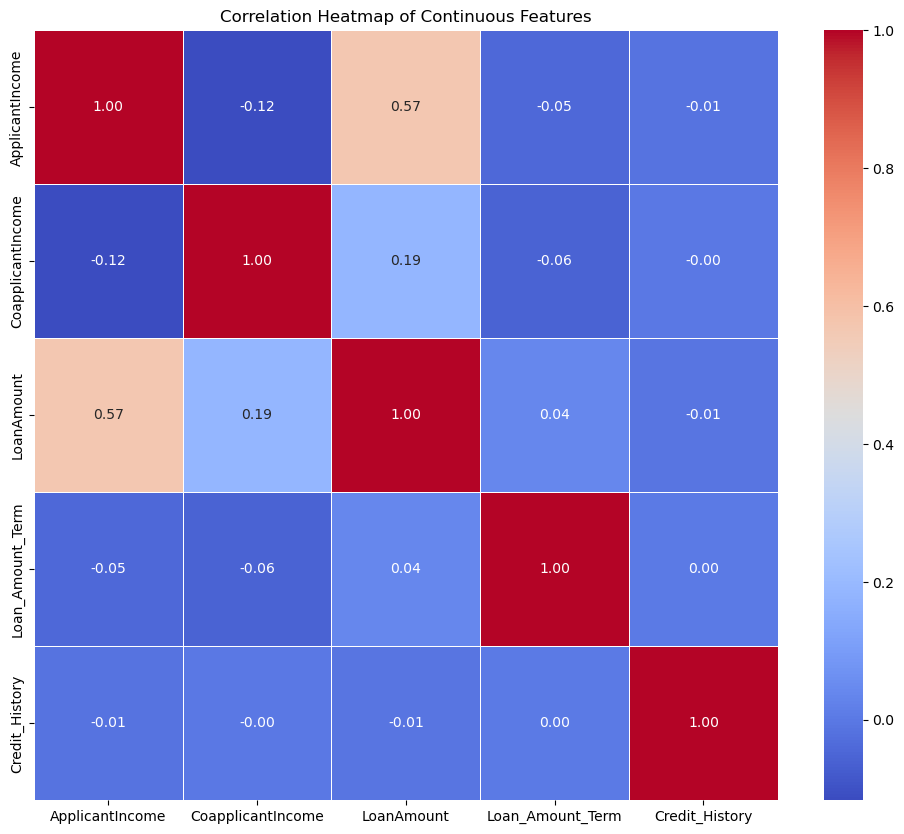

In [14]:
cont_cols = train_data.select_dtypes(include=[np.number]).columns.tolist()

# Calculate the correlation matrix
correlation_matrix = train_data[cont_cols].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Continuous Features')
plt.show()

From the correlation heatmap above we can see that there is infact a correlation between the ApplicantIncome and LoanAmount as we deduced from the histograms.

# Cleaning up the data

Cleaning up the data helps with analysis. This below section involves transforming the data from its raw form into a state that can then be used for further analysis, such as model testing.

In [45]:
#Check for missing values

train_data.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

The above details how many missing data points we have for each column. Below, we'll fill these missing data points in to make the dataset easier to work with.

In [46]:
train_data['LoanAmount'].fillna(train_data['LoanAmount'].mean(),inplace=True)

C:\Users\djjjo\AppData\Local\Temp\ipykernel_339232\2407879627.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['LoanAmount'].fillna(train_data['LoanAmount'].mean(),inplace=True)


In [47]:
train_data['Self_Employed'].fillna('No',inplace=True)

C:\Users\djjjo\AppData\Local\Temp\ipykernel_339232\1899473978.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Self_Employed'].fillna('No',inplace=True)


In [48]:
train_data['Gender'].fillna(train_data['Gender'].mode()[0], inplace=True)
train_data['Married'].fillna(train_data['Married'].mode()[0], inplace=True)
train_data['Dependents'].fillna(train_data['Dependents'].mode()[0], inplace=True)
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mode()[0], inplace=True)
train_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0], inplace=True)

C:\Users\djjjo\AppData\Local\Temp\ipykernel_339232\3954965416.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Gender'].fillna(train_data['Gender'].mode()[0], inplace=True)
C:\Users\djjjo\AppData\Local\Temp\ipykernel_339232\3954965416.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

In [50]:
#Confirming there are now no missing values

train_data.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [51]:
#Changing the qualitative varaibles from words to numbers

from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    train_data[i] = le.fit_transform(train_data[i])
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


Earlier, when we used the correlation heatmap we couldn't see if there was any correclation between the qualitative variables and the quantitative variables as the heatmap only took the quantitative ones into account. Now that we have assigned a numerical value to these qualitative variables we can see how they are related to others within the data.

This is now appropriate to be used for modelling as there are no missing values and every variable for each applicant has been assigned a numerical valuable. The original intention of this code was to train a model on a set of test data and test for accuracy, which can now be done after this data munging.